# Task 5: Exploratory Data Analysis - Sports
## <blockquote>Finding out the most successful teams, players and factors contributing win or loss of a team.</blockquote>
### Author: Marisha Bhatti
<br>
<br>

  - <b>Step 1:</b> Import all required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 - <b>Step 2:</b> Import the datasets

In [2]:
# Importing matches.csv
df1 = pd.read_csv("https://raw.githubusercontent.com/Marisha18/GRIP-Tasks/main/matches.csv")
df1.head(10)
#len(df1) # checking for the length of dataset (756)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
df1.describe() # statistical representation of data

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [4]:
df1.isna().sum() # checking for NA

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
df1['city'].fillna('Dubai',inplace= True) # replacing for NA in city

In [6]:
# Importing deliveries.csv
df2 = pd.read_csv("https://raw.githubusercontent.com/Marisha18/GRIP-Tasks/main/deliveries.csv")
df2.head(10)
#len(df2) # checking for the length of dataset (179078)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [7]:
df2.describe() # statistical representation of data

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [8]:
df2.isna().sum() # checking for NA

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

Important features don't have NA

In [9]:
# Correcting team names to present
df1.loc[(df1.team1 == 'Delhi Daredevils'),'team1'] = 'Delhi Capitals'
df1.loc[(df1.team2 == 'Delhi Daredevils'),'team2'] = 'Delhi Capitals'
df1.loc[(df1.winner == 'Delhi Daredevils'),'winner'] = 'Delhi Capitals'
df1.loc[(df1['toss_decision'] == 'Delhi Daredevils'),'toss_decision'] = 'Delhi Capitals'
df1 = df1.replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')

# Checking the changes
df1.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [10]:
# Correcting team names to present
df2.loc[(df2['batting_team'] == 'Delhi Daredevils'),'batting_team'] = 'Delhi Capitals'
df2.loc[(df2['bowling_team'] == 'Delhi Daredevils'),'bowling_team'] = 'Delhi Capitals'
df2 = df2.replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')

# Checking the changes
df2.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


 - <b>Step 3:</b> Exploratory Data Analysis and Data Visualization

###### Effect of Toss

In [11]:
df1[df1['toss_winner']==df1['winner']].shape[0]/df1.shape[0]*100

47.354497354497354

Toss has very little effect over the outcome of the game contrary to popular opinion.

###### Matches won by a Team

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: result, dtype: int64

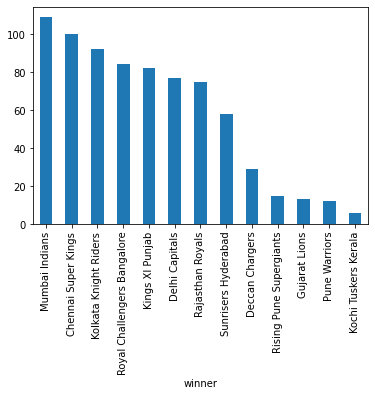

In [12]:
Win = df1.groupby('winner').count().sort_values(by='result', ascending=False)['result']
Win.plot.bar()
Win

###### Top 10 Players with highest number of Player of the Match Awards

player_of_match
CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: dl_applied, dtype: int64

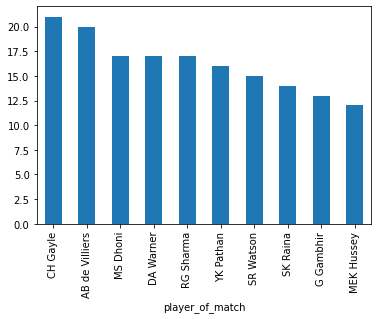

In [13]:
POM = df1.groupby('player_of_match').count().sort_values('dl_applied', ascending=False).head(10)['dl_applied']
POM.plot.bar()
POM

<b>Top 3 Players:</b> CH Gayle; AB de Villiers; MS Dhoni

###### Batting

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

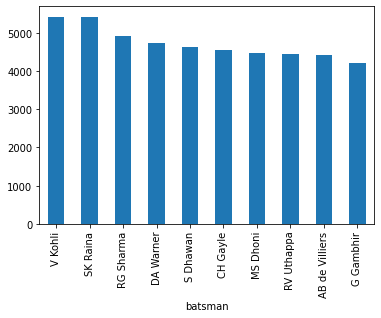

In [14]:
# Total number of runs by a batsman
run = df2.groupby('batsman').sum().sort_values(by='batsman_runs', ascending=False)['batsman_runs']
run.head(10).plot.bar()
run.head(10)

In [15]:
# Total number of balls faced by a batsman
bal = df2.groupby('batsman').count().sort_values(by='batsman_runs', ascending=False)['batsman_runs']
bal.head(10)

batsman
V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman_runs, dtype: int64

,batsman_runs_x,balls_faced,strike_rate
batsman,,,
V Kohli,5434,4211,129.042983
SK Raina,5415,4044,133.902077
RG Sharma,4914,3816,128.773585
DA Warner,4741,3398,139.523249
S Dhawan,4632,3776,122.669492
CH Gayle,4560,3131,145.640370
MS Dhoni,4477,3318,134.930681
RV Uthappa,4446,3492,127.319588
AB de Villiers,4428,2977,148.740343


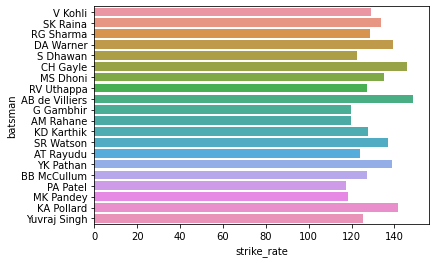

In [16]:
# Strike Rate of a batsman
Batsmen = pd.merge(run, bal, left_on="batsman", right_on="batsman")
Batsmen['balls_faced'] = Batsmen["batsman_runs_y"]
Batsmen = Batsmen.drop("batsman_runs_y",axis=1)
Batsmen["strike_rate"] = (Batsmen["batsman_runs_x"]/Batsmen["balls_faced"])*100

# Visualise
Best_Batsmen = Batsmen.sort_values(['batsman_runs_x','strike_rate'], ascending=False)[:20]
sns.barplot(data=Best_Batsmen, x="strike_rate", y=Best_Batsmen.index)
Batsmen.head(10)

<AxesSubplot:xlabel='batsman_runs_x', ylabel='batsman'>

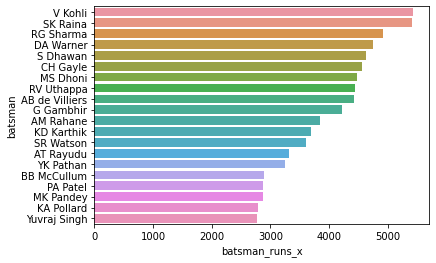

In [17]:
# Plot batsman_runs_x
sns.barplot(data=Best_Batsmen, x="batsman_runs_x", y=Best_Batsmen.index)

###### Fielding

fielder
MS Dhoni          23
RA Jadeja         20
V Kohli           17
SK Raina          16
AB de Villiers    14
KD Karthik        14
MK Pandey         14
PA Patel          12
DJ Bravo          12
AT Rayudu         10
Name: total_runs, dtype: int64

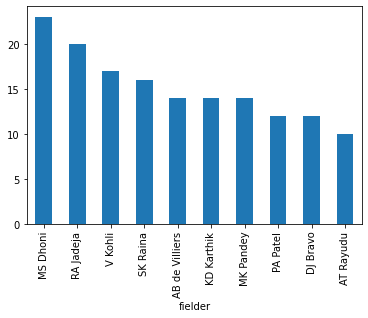

In [18]:
# Most Run-outs by a fielder
run_out = df2[df2['dismissal_kind']=='run out']
run_out = run_out.groupby('fielder').count().sort_values(by='total_runs', ascending= False)['total_runs']
run_out.head(10).plot.bar()
run_out.head(10)

fielder
KD Karthik        109
SK Raina           99
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
RG Sharma          82
KA Pollard         76
V Kohli            73
PA Patel           69
S Dhawan           68
Name: total_runs, dtype: int64

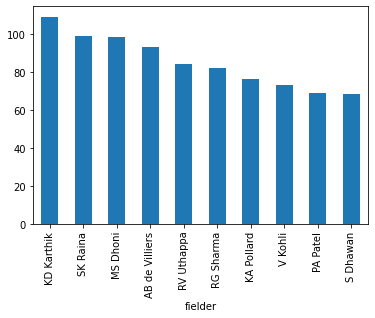

In [19]:
# Most Catch-outs by a fielder
catch_out = df2[(df2['dismissal_kind']=='caught') | (df2['dismissal_kind']=='caught and bowled') ]
catch_out = catch_out.groupby('fielder').count().sort_values(by='total_runs',ascending= False)['total_runs']
catch_out.head(10).plot.bar()
catch_out.head(10)

###### Bowling

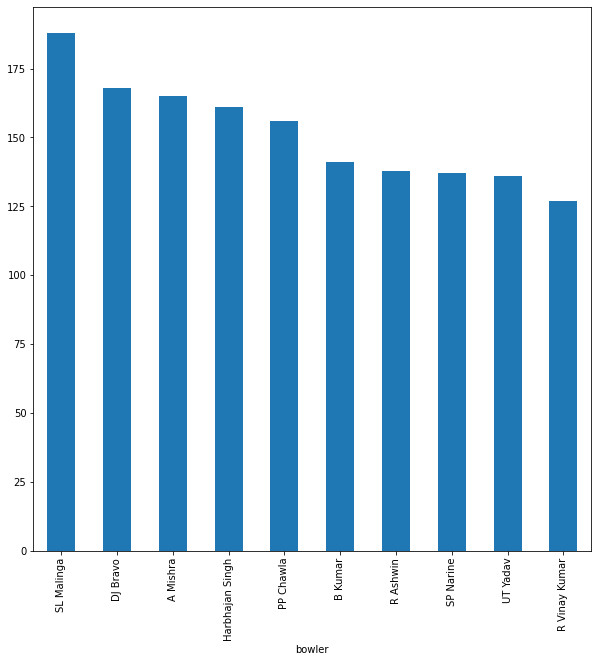

In [20]:
Wickets=df2[pd.notnull(df2)["dismissal_kind"]]

#Dropping the run outs as it doesn't count towards bowler stats
Wickets.drop(Wickets[Wickets["dismissal_kind"] == "run out"].index)

# Most wickets for a bowler
wkt = Wickets.groupby("bowler")
wkts = wkt.count().sort_values("match_id", ascending=False)['match_id']
plt.figure(figsize=(10,10))
wkts.head(10).plot.bar()
plt.show()

<AxesSubplot:xlabel='bowler'>

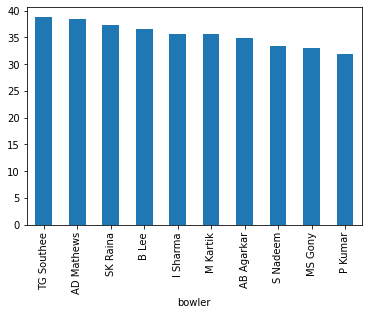

In [21]:
df2['Bowler runs']= df2['batsman_runs']+ df2['wide_runs'] + df2['noball_runs']

# Bowlers with best average
avg = df2.groupby('bowler').sum()['Bowler runs']
average = (avg/wkts[wkts>25]).sort_values(ascending=False).head(10) # Minimum 25 wickets
average.plot.bar()

# <b>_____________</b>